In [1]:
#事实上我们的讨论在7已经结束了
#非常简单粗暴的策略，
#下面我们想开发一个方法
#如何判断现在这个时刻有大新闻发生
#使得μ的值发生巨大变化？
#非交易时间的新闻是没有办法的，股价会突变
#市场一直开着
#假设突然某个时刻从μ1跳到μ2
#先模拟一个看看
#和弛豫过程一样啊
#但是和直接是μ2没区别

In [15]:
using DifferentialEquations
using Plots
using QuadGK
global θ=1.0
global σ=1.0
global μ1=100.0
global μ2=50.0
global dt=0.01
global T0=0.0
global T=10.0
global T_shock=10.0

10.0

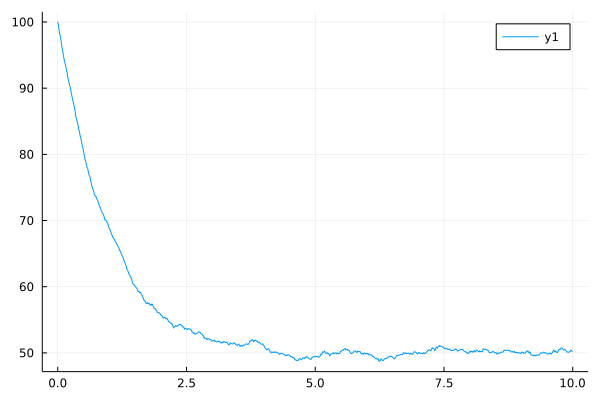

In [13]:
X=OrnsteinUhlenbeckProcess(θ,μ2,σ,T0,μ1)
X.dt=dt
calculate_step!(X,dt,nothing,nothing)
for t in dt:dt:T
    accept_step!(X,dt,nothing,nothing)
end
plot(X.t,X.u)

In [14]:
#简单，我们把μ也建模成随机变量，但是没有噪声，是随时间光滑变化
#必须把Chris的代码扒开了
#https://github.com/SciML/DiffEqNoiseProcess.jl/blob/master/src/noise_interfaces/noise_approximation_interface.jl

In [ ]:
#可估参数的无偏估计不唯一。我们希望在所有的无偏估计中选取一个方差最小的估计。
#充分统计量：若给定统计量的值，样本联合密度的条件分布与未知参数无关，则这个统计量为充分统计量。
#X1,X2,⋯,Xn是从总体X中抽取的容量为n的一个样本，
#如果函数T(X1,X2,⋯,Xn)不含任何未知参数，
#则称函数T(X1,X2,⋯,Xn)是一个统计量。
#https://zhuanlan.zhihu.com/p/87520809
#因子分解定理
#设总体概率函数为f(x;θ),X1~Xn为样本，那么T(X1,X2,⋯,Xn)为充分统计量的充要条件为：
#存在函数g(t,θ)与h(X1...Xn)使得对任意的θ和任意一组的观测值 X1...Xn，
#都有 f(X1...Xn;θ)=g(T(X1,X2,⋯,Xn),θ)*h(X1...Xn)
#极小充分统计量T*,∀T,∃φ,T=φ∘T*

In [ ]:
#这里有个老师
#https://www.math.pku.edu.cn/teachers/lidf/docs/statcomp/html/_statcompbook/sim-intro.html

In [ ]:
#问题：S/n为什么是平均值的最佳估计，有没有其他可能
#因为
#别忘了切比雪夫不等式
#极大似然估计：我们已知pdf是某一族函数，现在手里有数据D，让P(出现D|当参数是θ)最大
#TODO：学Fisher信息
#TODO：学Fisher信息
#TODO：学Fisher信息

In [16]:
#一致最小方差无偏估计 UMVUE Minimum-variance unbiased estimator
#https://zhuanlan.zhihu.com/p/94426157
#若是完备充分统计量，UMVUE唯一
#怎么找：https://www.zhihu.com/question/36803308
#Definition 3: Complete distribution family
#设X~ℱ(是一族分布)，如果对于任何的可测函数h(x)，由𝔼_θ[h(X)]对任意的θ成立，可以推出 h=0 a.e.，则称分布族完备。

In [ ]:
#怎么求UMVUE
#https://www.zhihu.com/question/36803308
#Lehmann–Scheffé theorem
#Rao-Blackwell Theorem
#我怎么知道是不是充分统计量？
#都是要先确定ℱ显式关于θ

In [ ]:
#为什么次序统计量好，因为他的性质和具体的分布无关
#假设检验
# U统计量解决了我的问题
#由矩估计，用样本均值去估计，由强大数定律，由经典中心定理
#TODO：读 U统计量这一节
#TODO：读 U统计量这一节
#TODO：读 U统计量这一节

In [ ]:
#我最古老的问题：给一个OU过程，怎么最有效率的估计μ?
#均值是可以的，但它足够好吗？